### # Visualizando dados do SUS

### Para esse começo do bootcamp, vamos analisar os dados da saúde disponíveis em:
http://tabnet.datasus.gov.br/cgi/tabcgi.exe?sih/cnv/qiuf.def

Notebook referente às anotações e desafios da aula 2 do bootcamp

Em que aplicamos: linha=Unidade da federação, Coluna= Ano/mês atendimento, Conteúdo= Valor total, Períodos: Todos disponíveis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

%matplotlib inline

In [2]:
url_dados = 'https://github.com/silvio-sjsj/bootcamp2_Alura_2021/blob/main/modulo1/A165942189_28_143_208.csv?raw=True'

In [3]:
dados = pd.read_csv(url_dados,
                    encoding="ISO-8859-1",
                    skiprows=3, sep=";", skipfooter=12, engine="python",
                    thousands=".", decimal=",")

dados.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,9.964113e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,4.500485e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1.917248e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,3.288770e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4.705309e+09


In [4]:
dados.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 287 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unidade da Federação  27 non-null     object 
 1   1992/Mar              27 non-null     object 
 2   1992/Abr              27 non-null     object 
 3   1993/Mai              27 non-null     object 
 4   1993/Dez              27 non-null     object 
 5   1994/Jan              27 non-null     object 
 6   1994/Fev              27 non-null     object 
 7   1994/Mai              27 non-null     object 
 8   1994/Ago              27 non-null     object 
 9   1994/Nov              27 non-null     object 
 10  1995/Jan              27 non-null     object 
 11  1995/Mar              27 non-null     object 
 12  1995/Jun              27 non-null     object 
 13  1995/Ago              27 non-null     object 
 14  1995/Dez              27 non-null     object 
 15  1996/Fev              27

Podemos ver nas informações acima que somente a partir de Agosto de 2007 que temos o dtype=float64, ou seja só temos valores numéricos tipo float a partir daí, anteriormente a isso as colunas são tratadas como object, provavelmente por não ter todos os valores como números, por ter entradas vazias etc.

In [5]:
dados.describe()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
count,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,...,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01
mean,3.049528e+05,7.881453e+05,2.440163e+06,5.517354e+06,1.233716e+07,7.634311e+07,2.382131e+07,2.587971e+07,2.621303e+07,2.621849e+07,...,5.769318e+07,5.619939e+07,5.390903e+07,5.391019e+07,5.373547e+07,5.377291e+07,4.947411e+07,3.899242e+07,2.416371e+07,6.388206e+09
std,3.928060e+05,1.071748e+06,3.421972e+06,7.767711e+06,1.634586e+07,2.011539e+08,3.445931e+07,3.481615e+07,3.478804e+07,3.506332e+07,...,7.437125e+07,7.309345e+07,7.111899e+07,6.937361e+07,6.906892e+07,6.884599e+07,6.684056e+07,5.469772e+07,3.570121e+07,8.572046e+09
min,4.113760e+03,1.185863e+04,4.385267e+04,2.266612e+05,4.706764e+05,8.084484e+05,7.716878e+05,8.760912e+05,8.969525e+05,1.027289e+06,...,2.536643e+06,2.702550e+06,2.533445e+06,1.853045e+06,5.090097e+05,6.893834e+05,3.476268e+05,4.165343e+05,9.287568e+05,3.098601e+08
25%,4.658042e+04,1.394239e+05,5.057784e+05,1.410611e+06,3.650090e+06,8.257222e+06,7.932274e+06,8.926011e+06,8.764560e+06,9.229050e+06,...,1.891155e+07,1.769663e+07,1.745713e+07,1.776822e+07,1.805814e+07,1.815776e+07,1.595916e+07,1.211052e+07,5.765751e+06,2.048684e+09
50%,1.793958e+05,4.180536e+05,1.152115e+06,2.406035e+06,5.949409e+06,1.656872e+07,1.021596e+07,1.226205e+07,1.245347e+07,1.190082e+07,...,2.860810e+07,2.572134e+07,2.509860e+07,2.525799e+07,2.431293e+07,2.727782e+07,2.443906e+07,1.900403e+07,1.306956e+07,2.660122e+09
75%,3.929855e+05,9.699998e+05,2.625636e+06,5.915822e+06,1.339497e+07,5.214780e+07,2.693269e+07,3.040087e+07,3.098278e+07,3.130500e+07,...,7.659508e+07,7.557613e+07,7.090146e+07,7.167527e+07,7.562979e+07,7.529893e+07,6.380372e+07,5.148696e+07,2.809080e+07,8.208101e+09
max,1.665350e+06,4.434169e+06,1.457740e+07,3.503226e+07,7.666855e+07,1.038067e+09,1.729620e+08,1.705567e+08,1.703382e+08,1.724621e+08,...,3.619869e+08,3.502687e+08,3.388725e+08,3.280558e+08,3.245998e+08,3.268462e+08,3.241154e+08,2.681931e+08,1.774083e+08,4.139641e+10


In [6]:
dados[['2008/Ago', '2008/Set']].head()

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


In [7]:
colunas_usaveis = dados.mean().index.tolist() #index é uma série imutável, então vamos transformar numa lista de python
colunas_usaveis.insert(0, 'Unidade da Federação') #para que possamos inserir a coluna unidade da federação na posição 0
colunas_usaveis

['Unidade da Federação',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',


In [8]:
usaveis = dados[colunas_usaveis]
usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,9.964113e+08
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,4.500485e+08
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1.917248e+09
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,3.288770e+08
4,15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4.705309e+09


In [9]:
usaveis = usaveis.set_index("Unidade da Federação")
usaveis

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1.829560e+06,1.940793e+06,1.955722e+06,2.143354e+06,2.280383e+06,...,1.047999e+07,1.143347e+07,8.876900e+06,8.167253e+06,8.759014e+06,9.003402e+06,8.414691e+06,6.039420e+06,4.732441e+06,9.964113e+08
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1.731745e+06,1.743979e+06,2.057439e+06,2.057830e+06,2.226578e+06,...,4.053085e+06,3.658266e+06,3.470409e+06,3.267919e+06,3.393958e+06,3.711661e+06,3.005561e+06,2.272734e+06,1.137342e+06,4.500485e+08
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,1.141921e+07,7.934652e+06,8.641517e+06,8.531576e+06,9.079902e+06,...,1.930374e+07,1.868723e+07,1.862863e+07,1.872825e+07,2.045157e+07,2.154606e+07,2.443906e+07,1.367936e+07,6.799061e+06,1.917248e+09
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,8.084484e+05,7.716878e+05,8.760912e+05,8.969525e+05,1.027289e+06,...,3.192075e+06,3.262354e+06,2.978629e+06,3.313297e+06,3.527263e+06,3.125022e+06,3.209324e+06,3.044799e+06,2.381844e+06,3.288770e+08
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,2.176210e+07,2.012608e+07,2.214938e+07,2.343668e+07,2.386108e+07,...,4.049635e+07,3.879339e+07,3.696595e+07,3.840662e+07,3.704303e+07,3.691444e+07,3.388777e+07,2.334322e+07,1.306956e+07,4.705309e+09
16 Amapá,33672.74,104822.98,118378.28,226661.18,844019.90,1.329877e+06,1.275064e+06,1.177746e+06,1.396372e+06,1.411521e+06,...,2.536643e+06,2.702550e+06,2.533445e+06,2.762003e+06,2.714711e+06,2.826612e+06,2.513766e+06,1.534733e+06,9.891554e+05,3.098601e+08
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5.136475e+06,5.051932e+06,5.200152e+06,5.343715e+06,5.344488e+06,...,7.934629e+06,6.488928e+06,4.229377e+06,1.853045e+06,5.090097e+05,6.893834e+05,3.476268e+05,4.165343e+05,9.287568e+05,1.020028e+09
21 Maranhão,385330.18,1018352.93,2277717.78,4334468.23,8832514.85,2.155160e+07,1.345226e+07,1.475090e+07,1.514865e+07,1.454368e+07,...,3.399135e+07,3.271126e+07,3.198571e+07,3.443046e+07,3.244680e+07,3.092707e+07,2.679770e+07,2.326025e+07,1.729451e+07,3.871069e+09
22 Piauí,220788.25,353468.67,1078182.68,2406035.32,4929772.93,1.137542e+07,9.711680e+06,1.042819e+07,1.022794e+07,1.056215e+07,...,2.581744e+07,2.245226e+07,2.063700e+07,2.032681e+07,2.002200e+07,1.935222e+07,1.843728e+07,1.363601e+07,9.542152e+06,2.280889e+09


In [10]:
usaveis['2019/Ago'].head()

Unidade da Federação
11 Rondônia     8909111.89
12 Acre         2981072.98
13 Amazonas    16493719.52
14 Roraima      3181321.82
15 Pará        36462011.47
Name: 2019/Ago, dtype: float64

In [11]:
usaveis.loc['12 Acre']

2007/Ago    1.047007e+04
2007/Set    1.400171e+04
2007/Out    8.620085e+04
2007/Nov    3.013237e+05
2007/Dez    7.696124e+05
                ...     
2020/Dez    3.711661e+06
2021/Jan    3.005561e+06
2021/Fev    2.272734e+06
2021/Mar    1.137342e+06
Total       4.500485e+08
Name: 12 Acre, Length: 165, dtype: float64

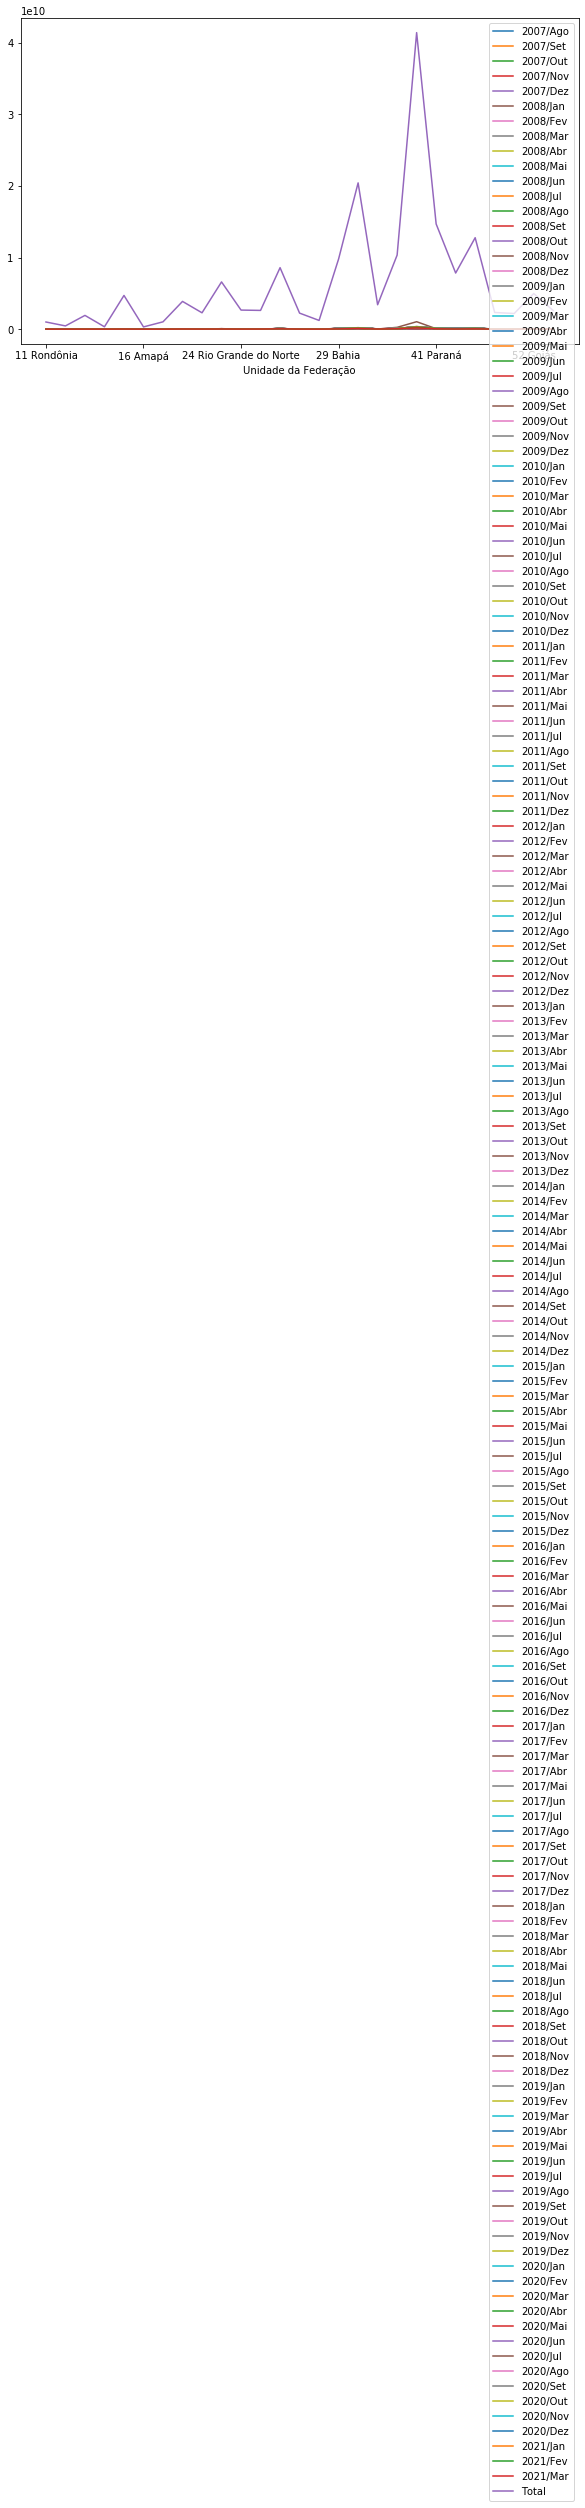

In [12]:
usaveis.plot(figsize=(10,6))

As linhas sairam como os meses, e por isso temos esse gráfico confuso. Podemos tomar a transposta da nossa matriz de dados para corrigir isso:

In [13]:
usaveis.T.head()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2007/Ago,4209.37,10470.07,35752.72,4785.91,181159.29,33672.74,4113.76,385330.18,220788.25,357904.65,...,57408.11,469469.34,1665349.90,554800.22,693955.05,1049252.33,199556.12,63562.50,179395.82,191951.47
2007/Set,16397.03,14001.71,45570.64,11858.63,433414.74,104822.98,76633.06,1018352.93,353468.67,572356.18,...,284224.80,921646.57,4434168.64,1431708.01,1092964.12,3182913.14,573675.41,232444.62,418053.58,769966.25
2007/Out,133645.19,86200.85,416012.30,43852.67,1893197.50,118378.28,343702.61,2277717.78,1078182.68,1865065.71,...,1152115.25,2994664.57,14577395.84,4630402.44,3562300.82,8571312.11,1069816.66,927219.59,1198730.25,2165619.56
2007/Nov,346912.84,301323.68,2020381.79,369328.51,5105406.44,226661.18,1068685.94,4334468.23,2406035.32,5131814.39,...,2296383.23,7250528.08,35032259.98,11120030.79,7578502.38,16592432.80,1995899.52,1740439.60,2712117.54,3813256.48
2007/Dez,711758.31,769612.36,5949408.99,470676.43,13162823.43,844019.90,3022200.87,8832514.85,4929772.93,10798042.86,...,5724199.54,13627123.27,76668547.41,28790722.87,14772555.10,30134255.70,4277979.14,5394225.43,9293914.78,7121965.42


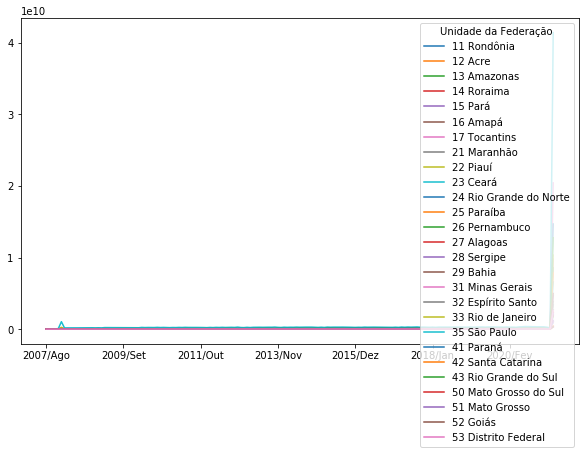

In [14]:
usaveis.T.plot(figsize=(10,6))

Precisamos remover a linha de gastos totais no fim do nosso dataframe, pois assim podemos plotar um gráfico que nos mostre os gatos no tempo e que seja mais apresentável. Podemos ver no plot acima que por conta do total, que soma todos os meses, o plot ficou totalmente 'amassado'.

In [15]:
usaveis = usaveis.drop('Total', axis=1)
usaveis

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1.829560e+06,1.940793e+06,1.955722e+06,2.143354e+06,2.280383e+06,...,1.099333e+07,1.047999e+07,1.143347e+07,8.876900e+06,8.167253e+06,8.759014e+06,9.003402e+06,8.414691e+06,6.039420e+06,4.732441e+06
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1.731745e+06,1.743979e+06,2.057439e+06,2.057830e+06,2.226578e+06,...,3.914824e+06,4.053085e+06,3.658266e+06,3.470409e+06,3.267919e+06,3.393958e+06,3.711661e+06,3.005561e+06,2.272734e+06,1.137342e+06
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,1.141921e+07,7.934652e+06,8.641517e+06,8.531576e+06,9.079902e+06,...,1.843306e+07,1.930374e+07,1.868723e+07,1.862863e+07,1.872825e+07,2.045157e+07,2.154606e+07,2.443906e+07,1.367936e+07,6.799061e+06
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,8.084484e+05,7.716878e+05,8.760912e+05,8.969525e+05,1.027289e+06,...,3.300013e+06,3.192075e+06,3.262354e+06,2.978629e+06,3.313297e+06,3.527263e+06,3.125022e+06,3.209324e+06,3.044799e+06,2.381844e+06
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,2.176210e+07,2.012608e+07,2.214938e+07,2.343668e+07,2.386108e+07,...,4.099455e+07,4.049635e+07,3.879339e+07,3.696595e+07,3.840662e+07,3.704303e+07,3.691444e+07,3.388777e+07,2.334322e+07,1.306956e+07
16 Amapá,33672.74,104822.98,118378.28,226661.18,844019.90,1.329877e+06,1.275064e+06,1.177746e+06,1.396372e+06,1.411521e+06,...,2.735248e+06,2.536643e+06,2.702550e+06,2.533445e+06,2.762003e+06,2.714711e+06,2.826612e+06,2.513766e+06,1.534733e+06,9.891554e+05
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5.136475e+06,5.051932e+06,5.200152e+06,5.343715e+06,5.344488e+06,...,7.871557e+06,7.934629e+06,6.488928e+06,4.229377e+06,1.853045e+06,5.090097e+05,6.893834e+05,3.476268e+05,4.165343e+05,9.287568e+05
21 Maranhão,385330.18,1018352.93,2277717.78,4334468.23,8832514.85,2.155160e+07,1.345226e+07,1.475090e+07,1.514865e+07,1.454368e+07,...,3.589444e+07,3.399135e+07,3.271126e+07,3.198571e+07,3.443046e+07,3.244680e+07,3.092707e+07,2.679770e+07,2.326025e+07,1.729451e+07
22 Piauí,220788.25,353468.67,1078182.68,2406035.32,4929772.93,1.137542e+07,9.711680e+06,1.042819e+07,1.022794e+07,1.056215e+07,...,1.877243e+07,2.581744e+07,2.245226e+07,2.063700e+07,2.032681e+07,2.002200e+07,1.935222e+07,1.843728e+07,1.363601e+07,9.542152e+06


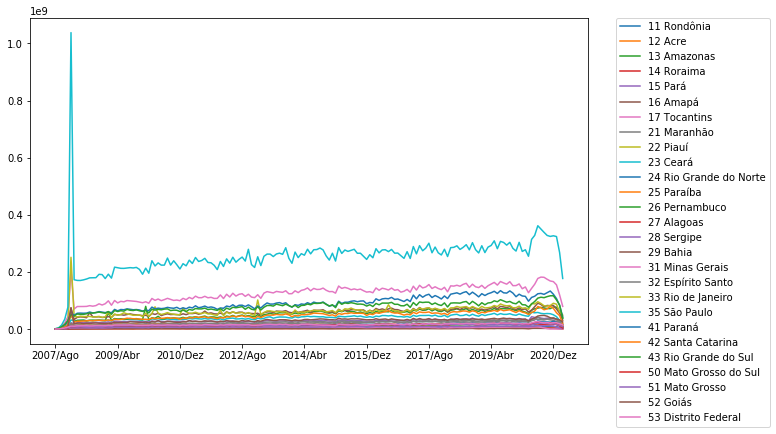

In [16]:
usaveis.T.plot(figsize=(10,6))
sns.set_palette(sns.color_palette("gist_rainbow", 27))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

E se quisermos plotar cinco estados de nossa preferência? ou plotarmos cinco estados escolhidos de forma aleatória?

In [17]:
estados_random = usaveis.T.sample(n=5, axis=1)
estados_random

Unidade da Federação,15 Pará,31 Minas Gerais,41 Paraná,28 Sergipe,50 Mato Grosso do Sul
2007/Ago,181159.29,9.713944e+05,5.548002e+05,27453.63,199556.12
2007/Set,433414.74,2.861782e+06,1.431708e+06,78565.19,573675.41
2007/Out,1893197.50,1.001801e+07,4.630402e+06,122952.94,1069816.66
2007/Nov,5105406.44,2.173028e+07,1.112003e+07,775705.52,1995899.52
2007/Dez,13162823.43,4.342952e+07,2.879072e+07,2765495.63,4277979.14
...,...,...,...,...,...
2020/Nov,37043032.10,1.685647e+08,1.334433e+08,11816872.93,21418665.16
2020/Dez,36914437.92,1.663770e+08,1.221463e+08,10997949.03,21387005.58
2021/Jan,33887773.65,1.550645e+08,1.069489e+08,7149727.62,16027788.65
2021/Fev,23343222.94,1.198774e+08,8.313018e+07,4129845.36,11428462.42


In [1]:
ax = estados_random.plot(figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Ano/Mês')
ax.set_ylabel('Gasto total (R$)')
plt.title('Evolução gasto do SUS por Estado')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

NameError: name 'estados_random' is not defined

Como criar uma nova coluna que seja a soma total acumulada até o mês mais recente por estado?

In [19]:
usaveis['total acumulado'] = usaveis.sum(axis=1)
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,total acumulado
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,9.964107e+08
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,4.500472e+08
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1.917245e+09
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,3.288766e+08
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4.705290e+09


In [20]:
indices = usaveis.index
indices

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [28]:
região = []

for i in indices:    
    if i[0] == '1':
        região.append('Norte')
    if i[0] == '2':    
        região.append('Nordeste')
    if i[0] == '3':        
        região.append('Sudeste')
    if i[0] == '4':    
        região.append('Sul')
    if i[0] == '5':
        região.append('Centro-Oeste')

usaveis['Região'] = região
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,total acumulado,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,9.964107e+08,Norte
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,4.500472e+08,Norte
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1.917245e+09,Norte
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,3.288766e+08,Norte
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4.705290e+09,Norte


Agora podemos reordenar as colunas do dataset usaveis, para que a nova coluna região fique ao lado da unidade da Federação:

In [32]:
usaveis_copia = usaveis.copy()
usaveis_copia.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,total acumulado,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,9.964107e+08,Norte
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,4.500472e+08,Norte
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1.917245e+09,Norte
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,3.288766e+08,Norte
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4.705290e+09,Norte


In [36]:
col_name="Região"
first_col = usaveis_copia.pop(col_name)
usaveis_copia.insert(0, col_name, first_col)
usaveis_copia.head()

,Região,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,total acumulado
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,Norte,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,9.964107e+08
12 Acre,Norte,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,4.500472e+08
13 Amazonas,Norte,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1.917245e+09
14 Roraima,Norte,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,3.288766e+08
15 Pará,Norte,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4.705290e+09
